# **La Ramona - Spotify Growth**

## **Exploratory Data Analysis**

### **Imports and data loading**


In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import plotly.express as px 
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

In [245]:
df_topten = pd.read_csv("Data/top_ten_dailystreams.csv")
df_topten['date']= pd.to_datetime(df_topten['date'])
df_topten = df_topten.set_index('date')

df_topten_2025 = df_topten[df_topten.index>'2025-01-01']

In [301]:
df_topten_2025.describe()

,Biutiful,Cherokee,Lo Que Nadie Pudo,Nunca Me Olvides,Quien Contra El Amor,Quier Sentirlo Otra Vez,Se Acabo el Amor,Senorita Ley D,Te Tengo y No Te Tengo,Temporal
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,22.375000,46.658333,9.000000,36.725000,48.150000,27.808333,52.116667,87.483333,39.375000,11.266667
std,4.979053,9.251387,3.559813,26.584877,31.486865,16.441031,22.994769,52.714386,8.176686,10.650864
min,11.000000,29.000000,3.000000,3.000000,5.000000,5.000000,18.000000,6.000000,15.000000,1.000000
25%,19.750000,40.000000,7.000000,13.750000,19.000000,16.000000,35.750000,50.750000,34.000000,5.000000
50%,22.000000,47.000000,8.000000,27.500000,43.000000,24.000000,49.500000,83.000000,39.000000,9.000000
75%,26.000000,53.000000,11.000000,57.000000,71.500000,36.250000,65.250000,119.500000,44.250000,14.000000
max,36.000000,73.000000,25.000000,126.000000,138.000000,109.000000,126.000000,287.000000,58.000000,88.000000


In [249]:
df_topten.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 2025-05-01 to 2024-01-01
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Biutiful                 487 non-null    int64
 1   Cherokee                 487 non-null    int64
 2   Lo Que Nadie Pudo        487 non-null    int64
 3   Nunca Me Olvides         487 non-null    int64
 4   Quien Contra El Amor     487 non-null    int64
 5   Quier Sentirlo Otra Vez  487 non-null    int64
 6   Se Acabo el Amor         487 non-null    int64
 7   Senorita Ley D           487 non-null    int64
 8   Te Tengo y No Te Tengo   487 non-null    int64
 9   Temporal                 487 non-null    int64
dtypes: int64(10)
memory usage: 41.9 KB


#### Visualise Streams by Song over Time

Building a function to plot songs, where we can control how far back we look. Some of the releases came out around 7 months ago, therefore don't work as well when we look back to the beginning of the dataset `2024-01-01` .

In [256]:
def build_daily_timeseries(df, start_date):

    df = df[df.index>start_date]
    
    plt.figure(figsize=(12, 6))    
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)
    
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())  
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
    
    plt.xticks(rotation=45)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Streams', fontsize=12)
    plt.title('Daily Streams by Song', fontsize=14, pad=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

#### Full Period

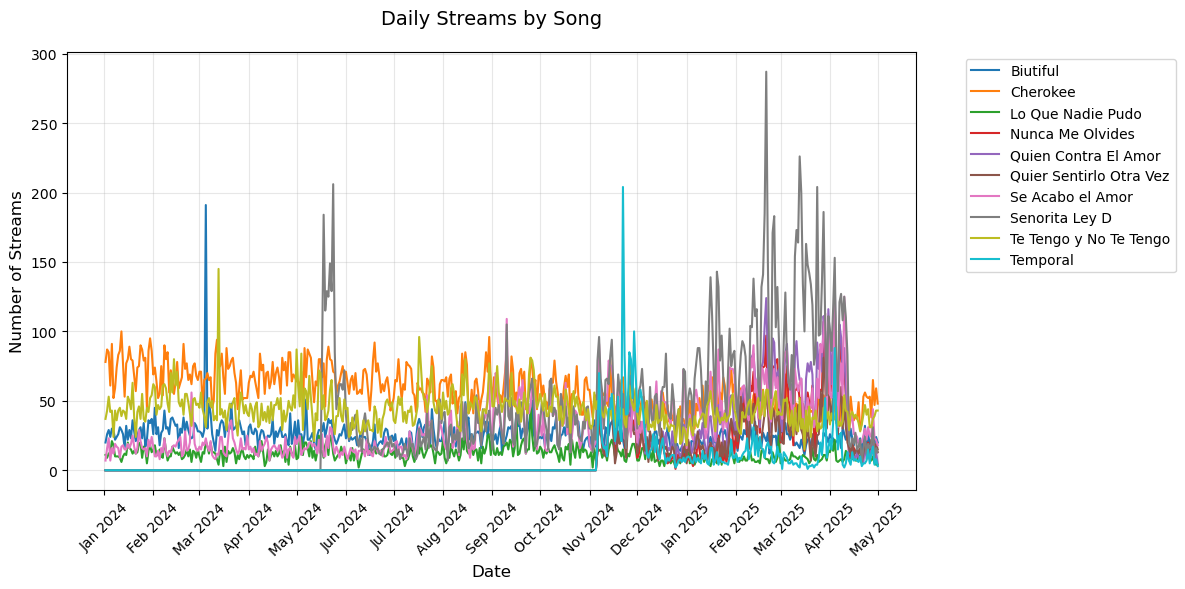

In [259]:
build_daily_timeseries(df_topten, '2024-01-01')

#### From start of 2025

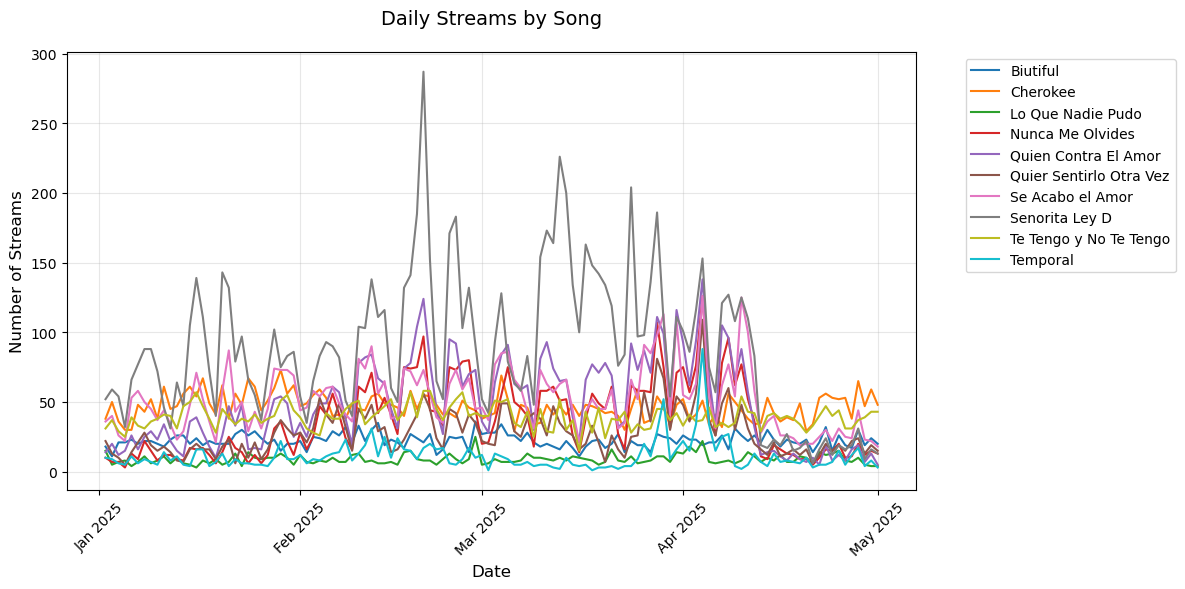

In [262]:
build_daily_timeseries(df_topten, '2025-01-01')

#### Dates with the highest total Streams

In [291]:
df_topten_2025.sum(axis=1).sort_values(ascending=False).head(10)

date
2025-04-04    869
2025-02-20    796
2025-03-28    749
2025-03-29    642
2025-03-31    600
2025-04-10    597
2025-04-08    595
2025-02-19    593
2025-02-12    593
2025-02-25    592
dtype: int64

#### Insights

It would appear there were spikes in Feb and May of 2024 and March and April of 2025.

More recently, `Señorita Ley D` is the best performing song.

When looking into the highest Streams by Date, it also mirrors the visualisation, with mid February & late March/ early April being days with the highest streams.

Something to consider when we pull in Social Media Activity.

#### Geographic Analysis

#### Ideas

- The top 10 highest days of streams.
- similar artists to her in cities where she is popular.
- look at the geographic following of instagram & spotify - correlated? 
- see if theres a link between instagram posts and spotify
- analyse the SEO of spotify
- find the  Audio Analysis of the top tracks, find similar songs from other artists.
- find playlists which contain songs with a similar structure and musical content, including rhythm, pitch, and timbre.
- understand the audience tastes, what else do they listen to.
- Once we have identified the genres Ramonas song best fit into, then find out the characteristics of the popular songs in that Genre.
- conduct Principal component analysis (PCA) on all the features of each of the songs (Acousticness, danceability, energy, duration, instrumentals, valence, popularity, tempo, and speechines) and find the features of the songs that group well together. - Use these to find good collaborations. ref (https://github.com/datares/TeamPink )


### Stats:

#### Regression Model: Quantifying Impact Factors
A multiple linear regression (or logistic regression for binary outcomes) can help you determine which factors most influence stream growth.

Example Model:


 | Factor Type          | Example Metrics                          | Data Source                     |
|----------------------|------------------------------------------|---------------------------------|
| **Song Characteristics** | Danceability, Energy, Valence, Duration | Spotify API (`audio_features`)  |
| **Social Media**     | TikTok shares, Instagram Reels views     | Instagram/TikTok APIs or manual |
| **Promotion**        | Playlist adds, PR campaigns              | Spotify for Artists CSV         |
| **Temporal**         | Release day, seasonality                 | Custom date features            |

#### Time-Series Analysis
Model how streams evolve post-release using:

ARIMA or Prophet to forecast trends.
Event studies: Measure impact of promotions (e.g., spikes after TikTok posts).

#### A/B Testing
**Hypothesis:** "Shorter songs (<2.5 mins) gain more streams."
**Method:** Compare streams of shortened vs. original tracks.

#### Sentiment Analysis (Social Media)
Use NLP on fan comments (Instagram/TikTok) to:
Gauge song reception (positive/negative).
Correlate sentiment with stream retention.

#### Clustering for Audience Segmentation
Group listeners by behavior (e.g., demographics, streaming patterns) using:
k-Means or DBSCAN on:
    Streaming frequency
    Geographic location
    Playlist interactions
**Actionable Insight:**
Target high-value clusters with tailored ads.


How to increase streams

- creating great playlists with own songs in and other favourite songs
- https://www.youtube.com/watch?v=Cyvtw_zpq8A&t=1s

### Connecting with the Spotify API (spotipy)

In [38]:
import yaml
import spotipy
from spotipy.oauth2 import SpotifyOAuth

In [40]:
# Load YAML credentials safely
with open("../Keys/spotify_credentials.yaml", 'r') as file:
    creds = yaml.safe_load(file)  # Prefer safe_load over load

In [42]:
# Login with Spotify Credentials
try:
    # Authenticate
    sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
        client_id=creds['client_id'],
        client_secret=creds['client_secret'],
        redirect_uri=creds['redirect_uri'],
        scope="user-read-private user-read-email user-library-read user-top-read"
    ))
    print(f"Logged in with new credentials.")
    
except SpotifyException as e:
    print(f"Spotify API error: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



Logged in with new credentials.


### Get List of Top Tracks

In [77]:
artist_top_tracks = sp.artist_top_tracks(creds['artist_id'])
# select the top 10 track names
i = 1
if artist_top_tracks != None:
    for track in artist_top_tracks['tracks']:
        print(f"{i}: {track["id"], track['name']}")
        i += 1



1: ('5BoA6gJzAUfa57JQ0WBt4t', 'Brío')
2: ('5YWDjRVcDMpiq2c5aTupFA', 'Señorita Ley D')
3: ('3qY0oKFlzTYfPoXS9cnn8z', 'Cherokee')
4: ('45U5BZPnQtWD0z2GWp04lc', 'Se Acabó el Amor')
5: ('07l2bAjmNxSmuDdH3ghDaX', 'Quién Contra el Amor')
6: ('5XJja9JOi51ypN62WtY6R0', 'Te Tengo y No Te Tengo')
7: ('5QCXu423YBBI2YiasmUvnb', 'Nunca Me Olvides')
8: ('7u7ROQeVY9pDVQuM5P76rO', 'Quiero Sentirlo Otra Vez')
9: ('4MkYxxx9s3QxRXASc9ZXen', 'Biutiful')
10: ('2M4UKnFXll9PYo5a2Zr6b9', 'Quemarlo Todo')
